In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ashishjangra27/bald-classification-200k-images-celeba

100% 1.32G/1.32G [00:15<00:00, 122MB/s]
100% 1.32G/1.32G [00:15<00:00, 93.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bald-classification-200k-images-celeba.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,InputLayer,BatchNormalization,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Dataset/Train',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256,256)
)

Found 160000 files belonging to 2 classes.


In [ ]:
train_ds = train_ds.shuffle(buffer_size=100)

In [ ]:
sample = train_ds.take(1)

In [ ]:
# Extract the image and label from the sample
for image, label in sample:
    image = image.numpy()[0]  # Convert the image tensor to a NumPy array
    label = label.numpy()[0]  # Convert the label tensor to a NumPy array
    break

In [ ]:
# Preprocess the image for evaluation
image = process(image, label)[0]


In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')
plt.title('Label: {}'.format(label))
plt.show()

In [ ]:
# Reshape the image if necessary
if image.shape != (256, 256, 3):
    image = tf.image.resize(image, (256, 256))

In [ ]:
# Add an extra dimension to match the model's input shape
image = tf.expand_dims(image, axis=0)

In [ ]:
# Evaluate the model on the preprocessed image
result = model.predict(image)
prediction = result[0][0]  # Get the predicted value

1/1 [==============================] - 0s 34ms/step


In [ ]:
# Display the evaluation result
print("Evaluation result:")
print("Prediction:", prediction)

Evaluation result:
Prediction: 1.0


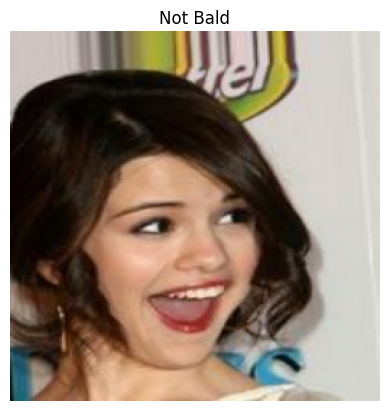

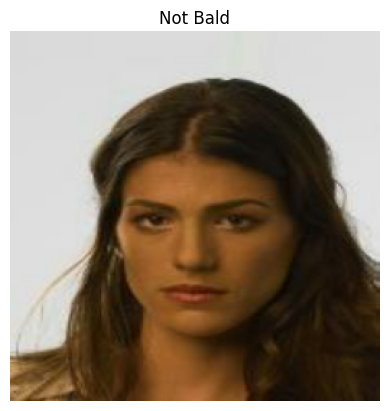

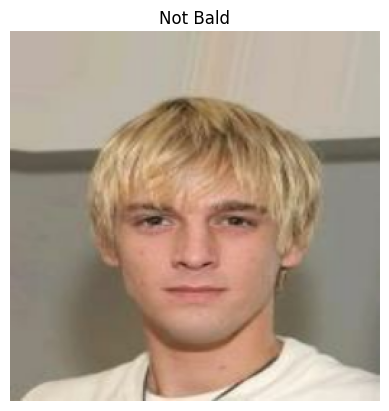

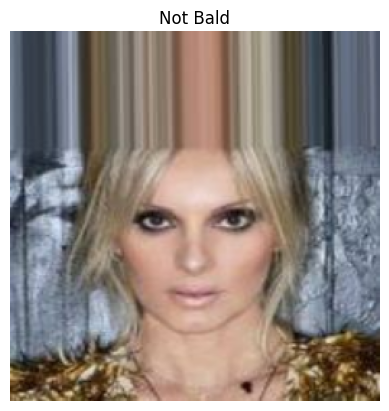

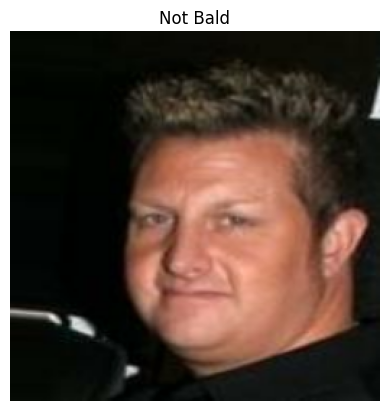

In [ ]:
for images, labels in train_ds:
    # Visualize a few sample images
    for i in range(5):  # Display the first 5 images
        plt.imshow(images[i].numpy().astype("uint8"))
        if labels[i] == 0:
            plt.title("Bald")
        else:
            plt.title("Not Bald")
        plt.axis("off")
        plt.show()
    break

In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Dataset/Validation',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256,256)
)

Found 22599 files belonging to 2 classes.


In [ ]:
validation_ds = validation_ds.shuffle(buffer_size=100)

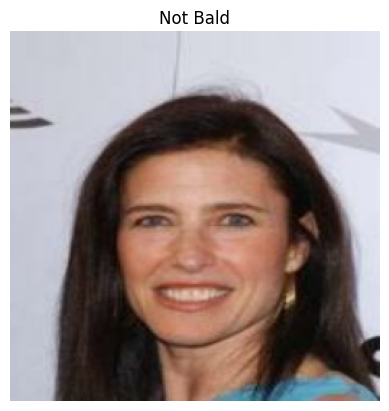

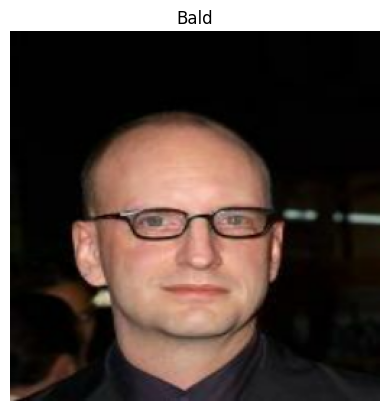

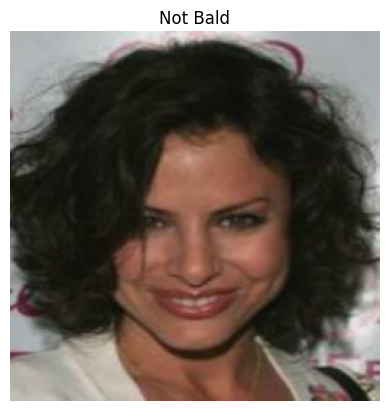

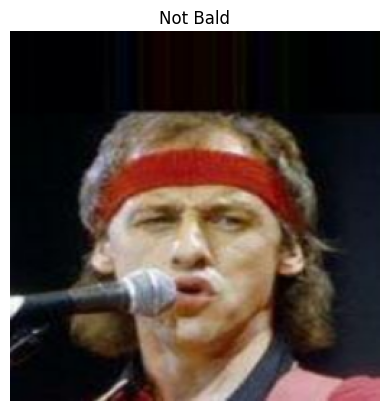

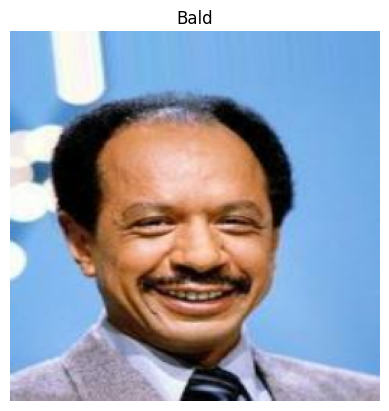

In [ ]:
for images, labels in validation_ds:
    # Visualize a few sample images
    for i in range(5):  # Display the first 5 images
        plt.imshow(images[i].numpy().astype("uint8"))
        if labels[i] == 0:
            plt.title("Bald")
        else:
            plt.title("Not Bald")
        plt.axis("off")
        plt.show()
    break

In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Dataset/Test',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
test_ds = test_ds.shuffle(buffer_size=100)

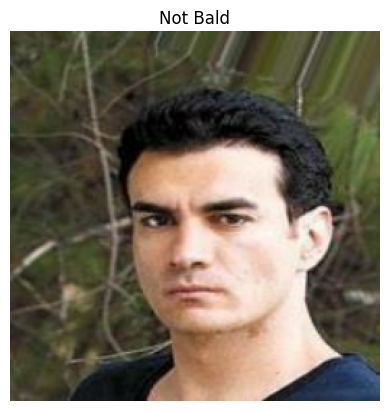

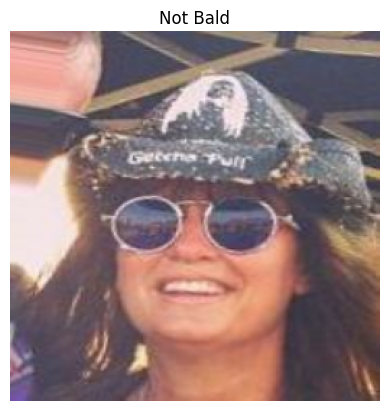

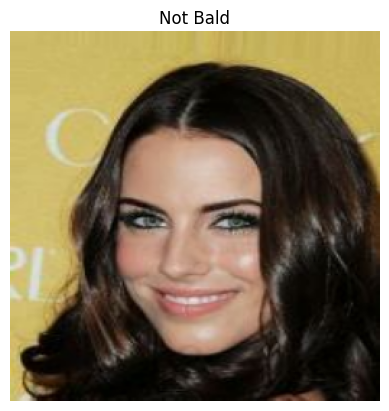

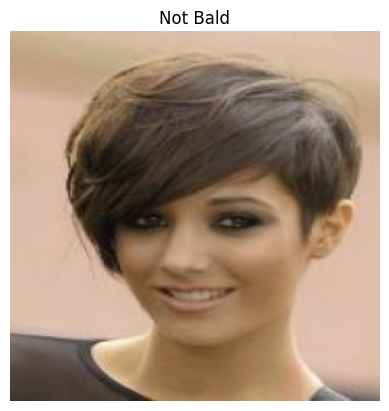

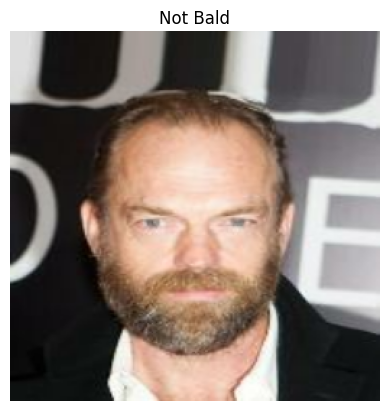

In [ ]:
for images, labels in test_ds:
    # Visualize a few sample images
    for i in range(5):  # Display the first 5 images
        plt.imshow(images[i].numpy().astype("uint8"))
        if labels[i] == 0:
            plt.title("Bald")
        else:
            plt.title("Not Bald")
        plt.axis("off")
        plt.show()
    break

In [ ]:
# Normalization
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
for image,label in validation_ds.take(1):
  print(image,label)

tf.Tensor(
[[[[0.05098039 0.03921569 0.01176471]
   [0.05098039 0.03921569 0.01176471]
   [0.05098039 0.03921569 0.01176471]
   ...
   [0.10886949 0.07749694 0.02651654]
   [0.10980392 0.07843138 0.02745098]
   [0.10980392 0.07843138 0.02745098]]

  [[0.05098039 0.03921569 0.01176471]
   [0.05098039 0.03921569 0.01176471]
   [0.05098039 0.03921569 0.01176471]
   ...
   [0.11191789 0.08054534 0.02956495]
   [0.11285233 0.08147978 0.03049939]
   [0.11285233 0.08147978 0.03049939]]

  [[0.05098039 0.03921569 0.01176471]
   [0.05098039 0.03921569 0.01176471]
   [0.05098039 0.03921569 0.01176471]
   ...
   [0.11279105 0.08141851 0.03043811]
   [0.11372549 0.08235294 0.03137255]
   [0.11372549 0.08235294 0.03137255]]

  ...

  [[0.12840073 0.0460478  0.30094975]
   [0.13825701 0.05590408 0.31080604]
   [0.15087873 0.06946022 0.3224933 ]
   ...
   [0.24053447 0.15239108 0.44035065]
   [0.22325003 0.1387678  0.4157439 ]
   [0.20481005 0.12245711 0.39304534]]

  [[0.13333334 0.05098039 0.305882

In [ ]:
dropout_rate = 0.3

regularization_rate = 0.01
model = tf.keras.Sequential([
    InputLayer(input_shape = (256,256,3)),

    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=2,padding='valid'),
    # Dropout(rate = dropout_rate),

    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=2,padding='valid'),

    Flatten(),

    # Dense(128,activation='relu'),
    # BatchNormalization(),
    # Dropout(rate = 0.1),

    Dense(64,activation='relu'),
    # BatchNormalization(),
    Dropout(rate=0.1),

    Dense(1,activation='sigmoid'),

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
es_callback = EarlyStopping(
    monitor='val_loss',patience=25,verbose=1,
    mode='auto',restore_best_weights=True
)

In [ ]:
fle_s ="/content/Bald_detector.h5"
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')

In [ ]:
callback_list = [checkpoint,es_callback]

In [ ]:
history = model.fit(validation_ds,validation_data=test_ds,epochs=100,batch_size=64,verbose=1,callbacks=callback_list)

Epoch 1/100
354/354 [==============================] - ETA: 0s - loss: 0.3778 - accuracy: 0.9714
Epoch 1: val_loss improved from inf to 0.24853, saving model to /content/Bald_detector.h5
354/354 [==============================] - 122s 278ms/step - loss: 0.3778 - accuracy: 0.9714 - val_loss: 0.2485 - val_accuracy: 0.9789
Epoch 2/100
354/354 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9781
Epoch 2: val_loss improved from 0.24853 to 0.09766, saving model to /content/Bald_detector.h5
354/354 [==============================] - 109s 288ms/step - loss: 0.1115 - accuracy: 0.9781 - val_loss: 0.0977 - val_accuracy: 0.9707
Epoch 3/100
354/354 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9789
Epoch 3: val_loss did not improve from 0.09766
354/354 [==============================] - 109s 286ms/step - loss: 0.0637 - accuracy: 0.9789 - val_loss: 0.1038 - val_accuracy: 0.9789
Epoch 4/100
354/354 [==============================] - ETA: 0s - loss: 0.

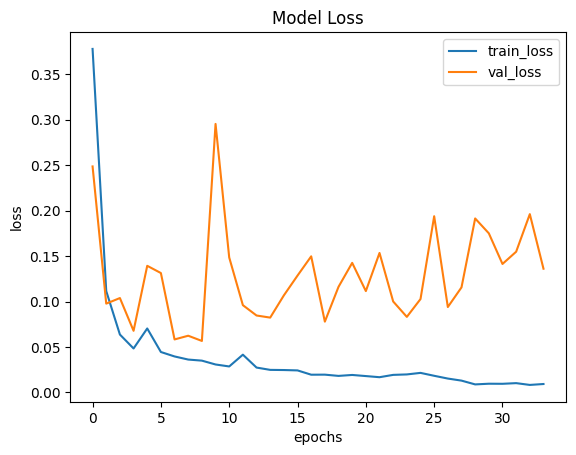

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'])
plt.show()

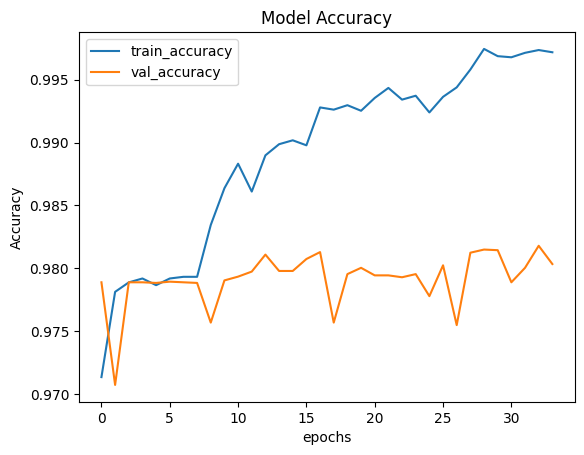

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

## Evaluation

In [ ]:
sample = train_ds.take(1)

In [ ]:
for image, label in sample:
    image = image.numpy()[0]  # Convert the image tensor to a NumPy array
    label = label.numpy()[0]  # Convert the label tensor to a NumPy array
    break

In [ ]:
# Preprocess the image for evaluation
image = process(image, label)[0]

In [ ]:
# Reshape the image if necessary (assuming the image has 3 color channels)
if image.shape[-1] == 3:
    image = np.reshape(image, (image.shape[0], image.shape[1], 3))


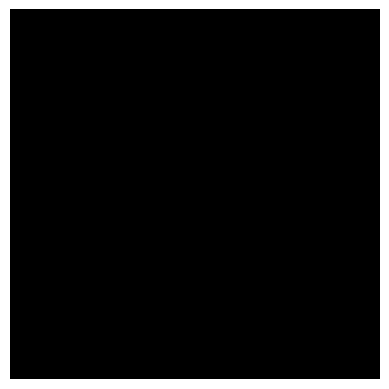

In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()
